In [241]:
import pymongo

In [242]:
import pandas as pd

In [243]:
import numpy as np

In [244]:
from unidecode import unidecode

In [245]:
from tqdm import tqdm

In [246]:
LANGUAGES = {
    'af': 'afrikaans',
    'sq': 'albanian',
    'am': 'amharic',
    'ar': 'arabic',
    'hy': 'armenian',
    'az': 'azerbaijani',
    'eu': 'basque',
    'be': 'belarusian',
    'bn': 'bengali',
    'bs': 'bosnian',
    'bg': 'bulgarian',
    'ca': 'catalan',
    'ceb': 'cebuano',
    'ny': 'chichewa',
    'zh-cn': 'chinese (simplified)',
    'zh-tw': 'chinese (traditional)',
    'co': 'corsican',
    'hr': 'croatian',
    'cs': 'czech',
    'da': 'danish',
    'nl': 'dutch',
    'en': 'english',
    'eo': 'esperanto',
    'et': 'estonian',
    'tl': 'filipino',
    'fi': 'finnish',
    'fr': 'french',
    'fy': 'frisian',
    'gl': 'galician',
    'ka': 'georgian',
    'de': 'german',
    'el': 'greek',
    'gu': 'gujarati',
    'ht': 'haitian creole',
    'ha': 'hausa',
    'haw': 'hawaiian',
    'iw': 'hebrew',
    'hi': 'hindi',
    'hmn': 'hmong',
    'hu': 'hungarian',
    'is': 'icelandic',
    'ig': 'igbo',
    'id': 'indonesian',
    'ga': 'irish',
    'it': 'italian',
    'ja': 'japanese',
    'jw': 'javanese',
    'kn': 'kannada',
    'kk': 'kazakh',
    'km': 'khmer',
    'ko': 'korean',
    'ku': 'kurdish (kurmanji)',
    'ky': 'kyrgyz',
    'lo': 'lao',
    'la': 'latin',
    'lv': 'latvian',
    'lt': 'lithuanian',
    'lb': 'luxembourgish',
    'mk': 'macedonian',
    'mg': 'malagasy',
    'ms': 'malay',
    'ml': 'malayalam',
    'mt': 'maltese',
    'mi': 'maori',
    'mr': 'marathi',
    'mn': 'mongolian',
    'my': 'myanmar (burmese)',
    'ne': 'nepali',
    'no': 'norwegian',
    'ps': 'pashto',
    'fa': 'persian',
    'pl': 'polish',
    'pt': 'portuguese',
    'pa': 'punjabi',
    'ro': 'romanian',
    'ru': 'russian',
    'sm': 'samoan',
    'gd': 'scots gaelic',
    'sr': 'serbian',
    'st': 'sesotho',
    'sn': 'shona',
    'sd': 'sindhi',
    'si': 'sinhala',
    'sk': 'slovak',
    'sl': 'slovenian',
    'so': 'somali',
    'es': 'spanish',
    'su': 'sundanese',
    'sw': 'swahili',
    'sv': 'swedish',
    'tg': 'tajik',
    'ta': 'tamil',
    'te': 'telugu',
    'th': 'thai',
    'tr': 'turkish',
    'uk': 'ukrainian',
    'ur': 'urdu',
    'uz': 'uzbek',
    'vi': 'vietnamese',
    'cy': 'welsh',
    'xh': 'xhosa',
    'yi': 'yiddish',
    'yo': 'yoruba',
    'zu': 'zulu'
}

In [248]:
client = pymongo.MongoClient("localhost", 27017)
coll = client.col_en_datos.words

In [249]:
def data_processing(x):
    if x['pron'] == None:
        return unidecode(x['word']).lower()
    else:
        return unidecode(x['pron']).lower()

In [250]:
words_ids = list(coll.distinct('id'))

In [251]:
lang_ids = list(coll.distinct('lang'))
#lang_ids = list(SUBLANGUAGES_V0)

In [282]:
matrix_dict = {}
for word in tqdm(words_ids[100:103], total=len(words_ids[100:103])):
    word_dist_matrix = np.zeros((len(lang_ids), len(lang_ids)))
    for e_i, i in enumerate(lang_ids):
        for e_j, j in enumerate(lang_ids):
            w_i = list(coll.find({'id':word, 'lang':i}))
            w_j = list(coll.find({'id':word, 'lang':j}))
            if len(w_i) != 0 and len(w_j) != 0 and i!=j:
                w_i = data_processing(w_i[0])
                w_j = data_processing(w_j[0])
                word_dist_matrix[e_i][e_j] = pylev.levenshtein(w_i,w_j)
            else:
                word_dist_matrix[e_i][e_j] = np.NaN
    matrix_dict[word] = word_dist_matrix







  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:07<00:14,  7.45s/it]





 67%|██████▋   | 2/3 [00:15<00:07,  7.55s/it]





100%|██████████| 3/3 [00:22<00:00,  7.49s/it]







In [284]:
coll_dist_m = client.col_en_datos.dist_m

In [285]:
for m in matrix_dict:
    coll_dist_m.insert({'word':m, 'matrix':matrix_dict[m].tolist()})

/home/jfm/antipodes/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


In [264]:
def_dist_matrix = []
for i in matrix_dict:
    def_dist_matrix.append(matrix_dict[i])

In [265]:
def_dist_matrix = np.nanmean(np.array(def_dist_matrix), axis=0)

/home/jfm/antipodes/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


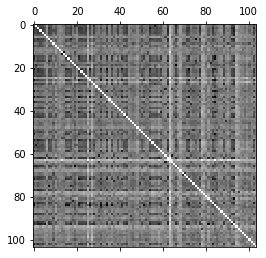

In [266]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(def_dist_matrix, cmap='gray')
plt.show()

In [267]:
same = np.argwhere(def_dist_matrix == np.nanmin(def_dist_matrix))
print(np.nanmin(def_dist_matrix))

0.0


In [268]:
for s in same:
    #w_i = data_processing(list(coll.find({'id':word, 'lang':lang_ids[s[0]]}))[0])
    #w_j = data_processing(list(coll.find({'id':word, 'lang':lang_ids[s[1]]}))[0])
    print("%s \t %s" % (LANGUAGES[lang_ids[s[0]]], LANGUAGES[lang_ids[s[1]]]))

danish 	 norwegian
galician 	 spanish
norwegian 	 danish
spanish 	 galician


In [272]:
s = pd.Series(def_dist_matrix[lang_ids.index("ru")])

In [273]:
s.index = pd.Series(lang_ids).apply(lambda x:LANGUAGES[x])

In [274]:
s.sort_values()

ukrainian             0.500000
mongolian             3.000000
belarusian            5.666667
polish                6.000000
azerbaijani           6.333333
croatian              6.333333
macedonian            6.333333
bosnian               6.666667
filipino              6.666667
spanish               7.000000
albanian              7.000000
basque                7.000000
latin                 7.000000
slovenian             7.000000
romanian              7.333333
galician              7.333333
norwegian             7.333333
hungarian             7.333333
bulgarian             7.333333
javanese              7.333333
shona                 7.333333
esperanto             7.333333
swedish               7.666667
english               7.666667
estonian              7.666667
portuguese            7.666667
catalan               7.666667
kyrgyz                8.000000
frisian               8.000000
tamil                 8.000000
                       ...    
zulu                 10.500000
somali  